<a href="https://colab.research.google.com/github/Evaggelou/Stack-Overflow-Survey/blob/main/Stack_Overflow_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/so-survey-2017/survey_results_schema.csv
/kaggle/input/so-survey-2017/survey_results_public.csv


In [ ]:
schema=pd.read_csv("/kaggle/input/so-survey-2017/survey_results_schema.csv")
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [ ]:
data=pd.read_csv("/kaggle/input/so-survey-2017/survey_results_public.csv")
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes writes code,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day each week","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [ ]:
pd.options.display.max_colwidth = 100
schema[schema['Column']=="DiversityImportant"]["Question"]

34    Diversity in the workplace is important
Name: Question, dtype: object

In [ ]:
columns = data.columns
print(columns[1:100])
print(columns[100:200])


Index(['Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob',
       'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType',
       'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction',
       'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance',
       'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving',
       'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity',
       'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers',
       'RightWrongWay', 'UnderstandComputers', 'SeriousWork',
       'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers',
       'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus',
       'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole',
       'Assess

In [ ]:
edu_type = data['EducationTypes'].value_counts().reset_index()
edu_type.head()

,index,EducationTypes
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [ ]:
#First of all let's clean the data
#Here we are no dealing with any null value as it will automatically not be considered

def clean_series(df,col_name):
    """
    inputs: 
    df: dataframe which you want to manipulate
    col_name: name of the column which you want to clean the data
    
    outputs:
    df2: Panda's dataframe with the unique element seperated and
         their count
    """
    temp = df[col_name]
    temp = temp.dropna().reset_index()
    temp = temp[col_name].str.split(';')
    emp_list=[]
    for i in range(len(temp)):
        emp_list += temp[i]

    for i in range(len(emp_list)):
        emp_list[i] = emp_list[i].strip()

    emp_set = list(set(emp_list))    
    emp_set

    c = Counter(emp_list)
    print(c.items())
    df2 = pd.DataFrame({'Methods':list(c.keys()),'Counts':list(c.values())})
    
    return df2

In [ ]:
from collections import Counter
methods = clean_series(data,'EducationTypes').sort_values(by='Counts')
methods


dict_items([('Online course', 13792), ('Open source contributions', 11225), ('Self-taught', 27330), ('Hackathon', 7150), ('Coding competition', 6683), ('Part-time/evening course', 4654), ('On-the-job training', 12508), ('Bootcamp', 2727), ('Industry certification', 4472)])


,Methods,Counts
7,Bootcamp,2727
8,Industry certification,4472
5,Part-time/evening course,4654
4,Coding competition,6683
3,Hackathon,7150
1,Open source contributions,11225
6,On-the-job training,12508
0,Online course,13792
2,Self-taught,27330


## Gender Job Satisfaction

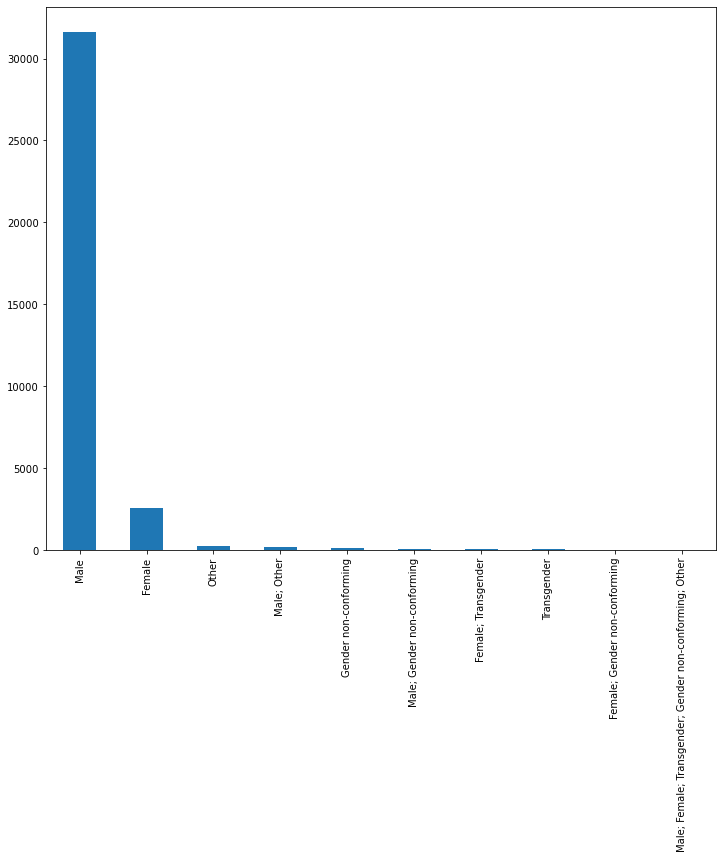

In [ ]:
data["Gender"].value_counts()[0:10].plot(kind='bar',figsize=(12,10));

In [ ]:
counts_genders =list(data["Gender"].value_counts()[:2])
counts_genders.append(sum(list(data["Gender"].value_counts()[2:])))
labels=list(data["Gender"].value_counts().index[:2])
labels.append("Other")

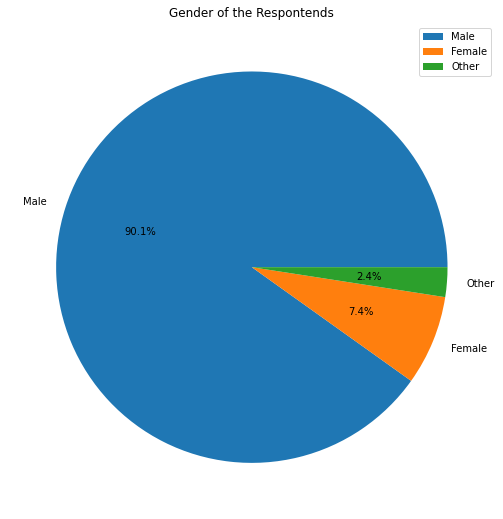

In [ ]:
fig, ax =plt.subplots(figsize=(10,9))
plt.title('Gender of the Respontends')
ax.pie(counts_genders,labels=labels, autopct='%1.1f%%');
ax.legend(labels=data["Gender"].value_counts().index, loc="upper right");

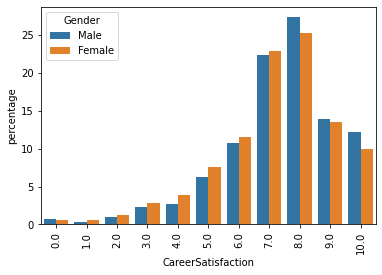

In [ ]:
# Select only the 2 gender with the most participants
df = data[(data["Gender"]=="Male") | (data["Gender"]=="Female")]

# Plot percentage of CareerSatisfaction per Gender
grouped = df.groupby(['Gender'], sort=False)
JobSatisfaction_counts = grouped['CareerSatisfaction'].value_counts(normalize=True, sort=False)

Satisfaction_data = [
    {'CareerSatisfaction': JobSatisfaction, 'Gender': Gender, 'percentage': percentage*100} for 
    (Gender, JobSatisfaction), percentage in dict(JobSatisfaction_counts).items()
]

df_Satisfaction = pd.DataFrame(Satisfaction_data)

p = sns.barplot(x="CareerSatisfaction", y="percentage", hue="Gender", data=df_Satisfaction)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

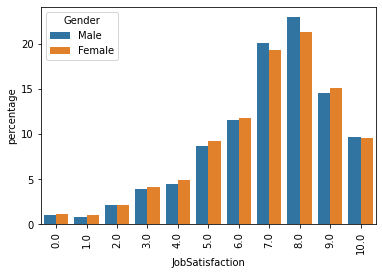

In [ ]:
# Plot percentage of JobSatisfaction per Gender
grouped = df.groupby(['Gender'], sort=False)
JobSatisfaction_counts = grouped['JobSatisfaction'].value_counts(normalize=True, sort=False)

Satisfaction_data = [
    {'JobSatisfaction': JobSatisfaction, 'Gender': Gender, 'percentage': percentage*100} for 
    (Gender, JobSatisfaction), percentage in dict(JobSatisfaction_counts).items()
]

df_Satisfaction = pd.DataFrame(Satisfaction_data)

p = sns.barplot(x="JobSatisfaction", y="percentage", hue="Gender", data=df_Satisfaction)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

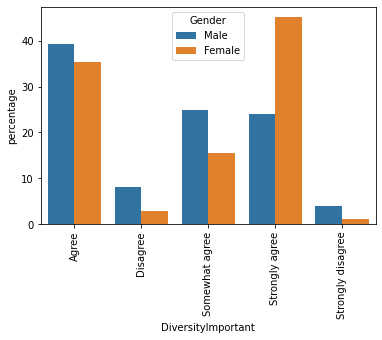

In [ ]:
# Plot percentage of JobSatisfaction per Gender
grouped = df.groupby(['Gender'], sort=False)
JobSatisfaction_counts = grouped['DiversityImportant'].value_counts(normalize=True, sort=False)

Satisfaction_data = [
    {'DiversityImportant': JobSatisfaction, 'Gender': Gender, 'percentage': percentage*100} for 
    (Gender, JobSatisfaction), percentage in dict(JobSatisfaction_counts).items()
]

df_Satisfaction = pd.DataFrame(Satisfaction_data)

p = sns.barplot(x="DiversityImportant", y="percentage", hue="Gender", data=df_Satisfaction)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

## Challenging per years

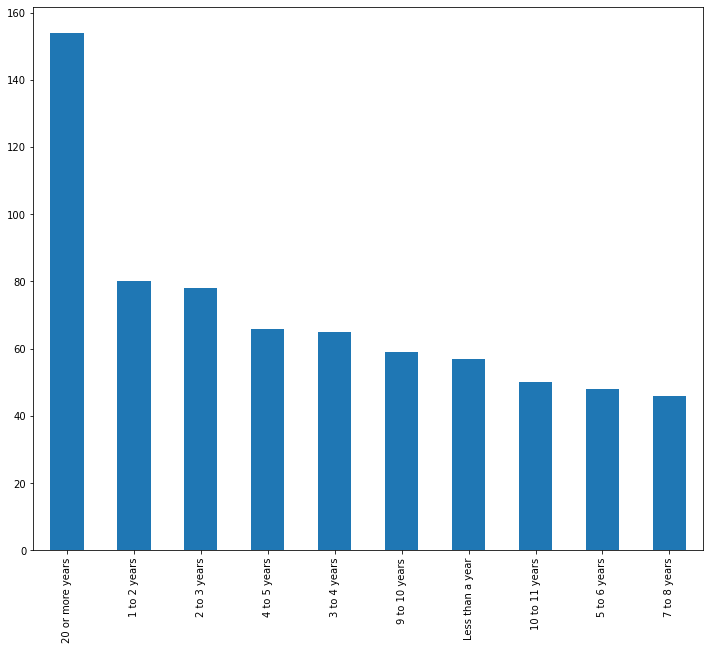

In [ ]:
#For how many years did you code as part of your job?
data["YearsCodedJobPast"].unique()
data["YearsCodedJobPast"].value_counts()[0:10].plot(kind='bar',figsize=(12,10));

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

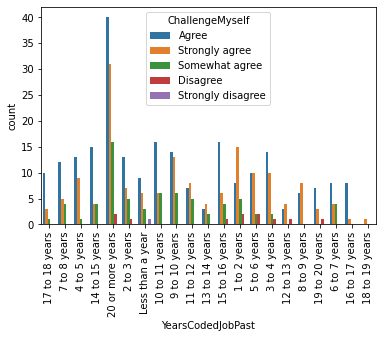

In [ ]:
# data["ChallengeMyself"].unique()
# data[["YearsCodedJobPast","ChallengeMyself"]].value_counts()[0:10].plot(kind='bar', stacked=True,figsize=(12,10));

#For how many years did you code as part of your job?
ax = sns.countplot(x="YearsCodedJobPast", hue="ChallengeMyself", data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

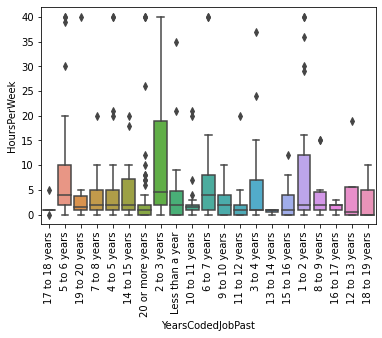

In [ ]:
# data["HoursPerWeek"]

# # data["ChallengeMyself"].unique()
# # data[["YearsCodedJobPast","ChallengeMyself"]].value_counts()[0:10].plot(kind='bar', stacked=True,figsize=(12,10));

# import seaborn as sns
# #For how many years did you code as part of your job?
# ax = sns.countplot(x="YearsCodedJobPast", hue="ChallengeMyself", data=df)
# plt.xticks(rotation=90)
df2= data[["HoursPerWeek","YearsCodedJobPast"]]

# df2.plot(kind='box')

sns.boxplot(x="YearsCodedJobPast", y="HoursPerWeek", data=df2)
plt.xticks(rotation=90)

# Last Question

In [ ]:
benefits = data["ImportantBenefits"].str.split(pat=";",expand=True)
t=[]
t.append(benefits[0].unique().tolist())
t.append(benefits[1].unique().tolist())
t.append(benefits[2].unique().tolist())
t.append(benefits[3].unique().tolist())
t.append(benefits[4].unique().tolist())

flat_list = [item for sublist in t for item in sublist]

set(flat_list)

{' Annual bonus',
 ' Charitable match',
 ' Child/elder care',
 ' Education sponsorship',
 ' Equipment',
 ' Expected work hours',
 ' Health benefits',
 ' Long-term leave',
 ' Meals',
 ' None of these',
 ' Other',
 ' Private office',
 ' Professional development sponsorship',
 ' Remote options',
 ' Retirement',
 ' Vacation/days off',
 'Annual bonus',
 'Charitable match',
 'Child/elder care',
 'Education sponsorship',
 'Equipment',
 'Expected work hours',
 'Health benefits',
 'Long-term leave',
 'Meals',
 None,
 'None of these',
 'Other',
 'Private office',
 'Professional development sponsorship',
 'Remote options',
 'Retirement',
 'Stock options',
 'Vacation/days off',
 nan}

In [ ]:
df = df.drop('Respondent', 1)

# Correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up figure
f, ax = plt.subplots(figsize=(15, 12))

# Plot the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

KeyError: "['Respondent'] not found in axis"

In [ ]:
plt.figure(figsize=(12,5));
sns.jointplot(x= data['JobSatisfaction'],y=data['Salary'],kind='kde');

In [ ]:
# Calculate average job satisfaction and salary for major countries

df = df.dropna(subset=['JobSatisfaction','Salary'], axis=0)
major_countries = df['Country'].value_counts()[:10].keys()

sal_mean = []
sat_mean = []

for i in range(len(major_countries)):
    sat_mean.append(df.loc[df['Country'] == major_countries[i]]['JobSatisfaction'].mean())
    sal_mean.append(df.loc[df['Country'] == major_countries[i]]['Salary'].mean())
    
# Compare these values by a scatter plot

plt.title("Job Satisfaction & Salary top 10 Countries")
plt.ylabel("Average Job Satisfaction")
plt.xlabel("Average Salary")
plt.scatter(sal_mean, sat_mean)
plt.show()